In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

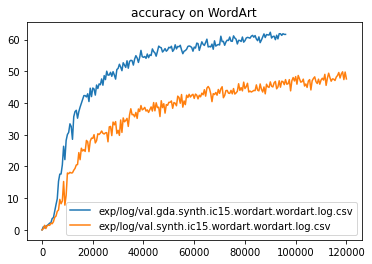

In [25]:
log_files = glob.glob('exp/log/val.*.csv')
for log_file in log_files:
    df = pd.read_csv(log_file)
    plt.plot(df['iter'], df['acc'], label=log_file)

plt.title('accuracy on WordArt')
plt.legend()
plt.show()

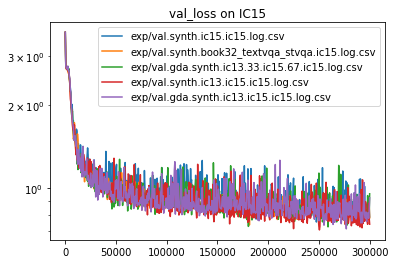

In [18]:
log_files = glob.glob('exp/val.*.csv')
for log_file in log_files:
    df = pd.read_csv(log_file)
    plt.plot(df['iter'], df['val_loss'], label=log_file)

plt.yscale('log')
plt.title('val_loss on IC15')
plt.legend()
plt.show()

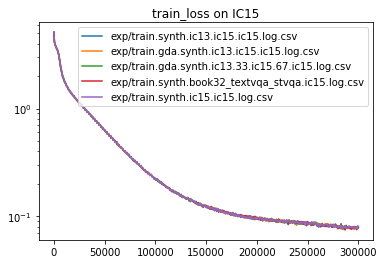

In [17]:
log_files = glob.glob('exp/train.*.csv')
for log_file in log_files:
    df = pd.read_csv(log_file)
    plt.plot(df['iter'], df['train_loss'], label=log_file)

plt.yscale('log')
plt.title('train_loss on IC15')
plt.legend()
plt.show()

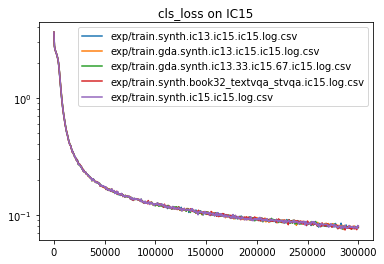

In [22]:
log_files = glob.glob('exp/train.*.csv')
for log_file in log_files:
    df = pd.read_csv(log_file)
    plt.plot(df['iter'], df['cls_loss'], label=log_file)

plt.yscale('log')
plt.title('cls_loss on IC15')
plt.legend()
plt.show()

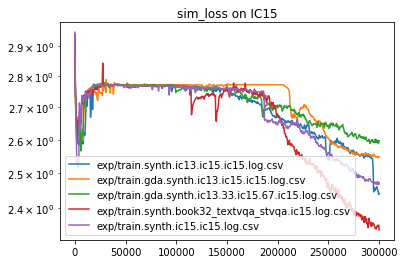

In [23]:
log_files = glob.glob('exp/train.*.csv')
for log_file in log_files:
    df = pd.read_csv(log_file)
    plt.plot(df['iter'], df['sim_loss'], label=log_file)

plt.yscale('log')
plt.title('sim_loss on IC15')
plt.legend()
plt.show()